In [58]:
import pandas as pd
df = pd.read_csv("Data/campeonato_paulista_1955_1976.csv")

In [59]:
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Paulista,1955,1955-01-10,Palmeiras,5,3,Jabaquara,VC,3,0,1
1,Paulista,1955,1955-02-10,Santos,4,1,XV de Jaú,VC,3,0,6
2,Paulista,1955,1955-02-10,Corinthians,3,2,São Paulo,VC,3,0,2
3,Paulista,1955,1955-02-10,São Bento,2,2,Guarani,E,1,1,4
4,Paulista,1955,1955-02-10,Ponte Preta,5,2,Taubaté,VC,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...
5256,Paulista,1976,1976-08-22,Guarani,0,0,Ponte Preta,E,1,1,217
5257,Paulista,1976,1976-08-22,Palmeiras,2,1,Corinthians,VC,3,0,214
5258,Paulista,1976,1976-08-22,Portuguesa,1,1,XV de Piracicaba,E,1,1,216
5259,Paulista,1976,1976-08-22,Ferroviária (SP),1,0,América (SP),VC,3,0,215


In [60]:
unique_values = df['Temp'].unique()
unique_values_as_strings = [str(value) for value in unique_values]
unique_values_sorted = sorted(unique_values_as_strings)
print(unique_values_sorted)

['1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976']


In [62]:
df.replace({'Portugues': 'Portuguesa',
             
            }, inplace=True)

df.to_csv('Data/campeonato_paulista_1955_1976', index=False)

In [64]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Games': 0, 'Victories': 0, 'Losses': 0, 'Draws': 0, 'Goals': 0, 'Points': 0})
        team_stats[home_team]['Games'] += 1
        team_stats[home_team]['Goals'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Victories'] += 1
            team_stats[home_team]['Points'] += 2
        elif result == 'VV':
            team_stats[home_team]['Losses'] += 1
        else:
            team_stats[home_team]['Draws'] += 1
            team_stats[home_team]['Points'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Games': 0, 'Victories': 0, 'Losses': 0, 'Draws': 0, 'Goals': 0, 'Points': 0})
        team_stats[away_team]['Games'] += 1
        team_stats[away_team]['Goals'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Losses'] += 1
        elif result == 'VV':
            team_stats[away_team]['Victories'] += 1
            team_stats[away_team]['Points'] += 2
        else:
            team_stats[away_team]['Draws'] += 1
            team_stats[away_team]['Points'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Team'})
    team_stats_df = team_stats_df.sort_values(by='Points', ascending=False)

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Victory Percentage'] = (team_stats_df['Victories'] / team_stats_df['Games']) * 100
    team_stats_df['Draw Percentage'] = (team_stats_df['Draws'] / team_stats_df['Games']) * 100
    team_stats_df['Loss Percentage'] = (team_stats_df['Losses'] / team_stats_df['Games']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Games'] * 2
    team_stats_df['Points Percentage'] = (team_stats_df['Points'] / max_possible_points) * 100

    return team_stats_df

# Example usage:
team_stats_df = update_team_stats(df)
print(team_stats_df)




                    Team  Games  Victories  Losses  Draws  Goals  Points  \
2                 Santos    643        421     110    112   1714     954   
0              Palmeiras    653        371     130    152   1250     894   
5              São Paulo    653        364     124    165   1284     893   
4            Corinthians    649        358     142    149   1236     865   
11            Portuguesa    647        307     189    151   1127     765   
7                Guarani    643        242     256    145    960     629   
17      Ferroviária (SP)    582        213     235    134    857     560   
18         Botafogo (SP)    583        183     250    150    802     516   
14         Juventus (SP)    612        181     290    141    785     503   
12              Noroeste    480        167     200    113    716     447   
13      XV de Piracicaba    499        154     221    124    689     432   
6              São Bento    493        133     229    131    558     397   
21          

In [65]:
team_stats_df

,Team,Games,Victories,Losses,Draws,Goals,Points,Victory Percentage,Draw Percentage,Loss Percentage,Points Percentage
2,Santos,643,421,110,112,1714,954,65.474339,17.418351,17.107309,74.183515
0,Palmeiras,653,371,130,152,1250,894,56.814701,23.277182,19.908116,68.453292
5,São Paulo,653,364,124,165,1284,893,55.742726,25.267994,18.989280,68.376723
4,Corinthians,649,358,142,149,1236,865,55.161787,22.958398,21.879815,66.640986
11,Portuguesa,647,307,189,151,1127,765,47.449768,23.338485,29.211747,59.119011
7,Guarani,643,242,256,145,960,629,37.636081,22.550544,39.813375,48.911353
17,Ferroviária (SP),582,213,235,134,857,560,36.597938,23.024055,40.378007,48.109966
18,Botafogo (SP),583,183,250,150,802,516,31.389365,25.728988,42.881647,44.253859
14,Juventus (SP),612,181,290,141,785,503,29.575163,23.039216,47.385621,41.094771
12,Noroeste,480,167,200,113,716,447,34.791667,23.541667,41.666667,46.562500


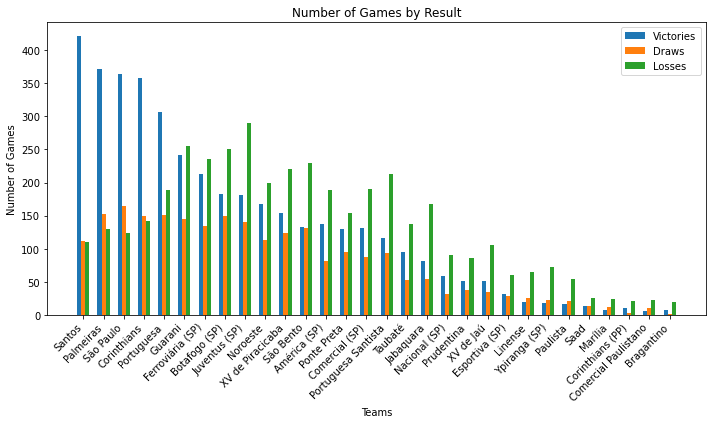

In [66]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Team']
victories = team_stats_df['Victories']
draws = team_stats_df['Draws']
losses = team_stats_df['Losses']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Victories')
bar2 = ax.bar([i + bar_width for i in index], draws, bar_width, label='Draws')
bar3 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='Losses')

# Adding labels, title, and legend
ax.set_xlabel('Teams')
ax.set_ylabel('Number of Games')
ax.set_title('Number of Games by Result')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


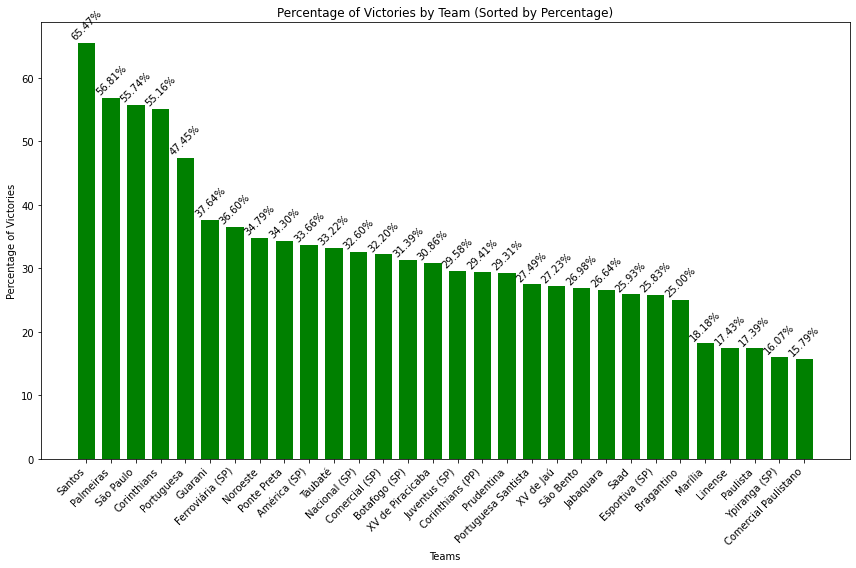

In [67]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Team']
victory_percentage = team_stats_df['Victory Percentage']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

bars = ax.bar(index, sorted_percentages, bar_width, color='green')

# Adding labels, title, and legend
ax.set_xlabel('Teams')
ax.set_ylabel('Percentage of Victories')
ax.set_title('Percentage of Victories by Team (Sorted by Percentage)')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


